# Intalar paquetes, Abrir data y ajustarla

## Descarga

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from geopandas import *

from plotnine import *

#para ajustar las fechas
import datetime

#para calcular el skew de un array() o list()
from scipy.stats import skew 

In [2]:
col_names=pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                      encoding="utf-8",sep=";",nrows=0).columns
types_dict = {col: str for col in list(col_names)}

Data = pd.read_csv("Data/(column)Facturac_2017_2020.csv",
                   encoding="utf-8",sep=";",dtype=types_dict)
Data.dtypes

Material                       object
Tipo de cliente                object
Zona de ventas                 object
Zona de ventas.1               object
Oficina de Ventas Unifica      object
Oficina de Ventas Unifica.1    object
Subtipo de cliente             object
Cluster                        object
Cliente - Local                object
Cliente - Local.1              object
Mes                            object
Año natural/Semana             object
Día natural                    object
Día de la semana               object
Kilos Venta KG                 object
Venta Neta CLP                 object
Precio Promedio CLP            object
dtype: object

In [3]:
Data.shape

(85746, 17)

In [4]:
Data.head()

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Alarcon Basabe Horacio Jesus,3200138357,9,39.2019,26.09.2019,JU,41,105.664,2.600
1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Nawrath Maira Maria Evangelina,25800,5,19.2019,09.05.2019,JU,20,65.934,3.300
1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Raul Octavio Farias Farias,30586,1,03.2019,17.01.2019,JU,19,46.525,2.500
1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Raul Octavio Farias Farias,30586,3,13.2018,26.03.2018,LU,21,52.406,2.450
1020003,Tradicional,Z001,Santiago,Huechuraba,T101,113101019,Espec. en Crudos,Clásico,Raul Octavio Farias Farias,30586,4,18.2018,30.04.2018,LU,14,36.920,2.600


In [5]:
Data[['Zona de ventas','Zona de ventas.1']].describe(include='all')

,Zona de ventas,Zona de ventas.1
count,85746,85746
unique,5,29
top,Centro Sur,Curico
freq,30946,9281


In [6]:
Data[Data['Zona de ventas.1']=='Temuco'].describe(include='all')

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
count,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873,3873
unique,1,1,1,1,1,87,5,3,324,329,12,227,1092,6,254,3760,542
top,Tradicional,Z004,Sur,Temuco,T105,8000580048,Espec. en Crudos,Clásico,Los Camperos Temuco,58651,2,16.2021,28.11.2019,VI,20,44.574,2.500
freq,3873,3873,3873,3873,3873,352,2900,2101,297,297,487,56,19,864,252,3,282


In [7]:
Data=Data[Data['Zona de ventas.1']=='Temuco']

## Arreglar Data

 * Extraer las unidades de las celdas
 * Cambiar el formato de los numeros
 * Cambiar el formato de las fechas (Separadas en dos columnas week, year)
 
 * Cambiar el nombre de las columnas problemas

In [8]:
def Ajuste_data(data):
    df=data.copy()
    # Funciones para eliminar los putos y cambiar las , por .
    def change_num_point(x):
        x=str(x)
        return x.replace('.', '')
    def change_num_coma(x):
        x=str(x)
        return x.replace(',', '.')
    for i in ['Kilos Venta KG','Venta Neta CLP','Precio Promedio CLP']:
        df[i]=df[i].apply(change_num_point)
        df[i]=df[i].apply(change_num_coma)
        df[i]=df[i].astype('int64')

        #Separacion fecha
    df['Semana']=df['Año natural/Semana'].str.split('.', expand=True)[[0]]
    df['Año']=df['Año natural/Semana'].str.split('.', expand=True)[[1]]

    df['Semana']=df['Semana'].astype('int64')
    df['Año']=df['Año'].astype('int64')
    
    #
    df["Día natural"] = df["Día natural"].apply(lambda x: 
                                                datetime.datetime.strptime(x,
                                                                           '%d.%m.%Y').date())
    return df

In [9]:
Data=Ajuste_data(Data)

In [10]:
####################################
# data solo posee año 2019 y 2020
####################################
#Data =Data[Data['year'] !='2018']
#Data =Data[Data['year'] !='2017']
Data =Data[Data['Año'] > 2018]
Data=Data[Data['Kilos Venta KG']<=3500]

In [11]:
Data.shape

(2563, 19)

### Descartar compras de mas de 3.5 toneladas

In [12]:
Data[Data['Kilos Venta KG']>=2000].groupby(['Cliente - Local.1']).count()['Kilos Venta KG']

Series([], Name: Kilos Venta KG, dtype: int64)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Kilos Venta KG, dtype: float64


<AxesSubplot:>

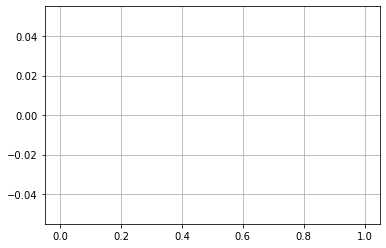

In [13]:
print(Data[Data['Cliente - Local.1']=='875' ].describe()['Kilos Venta KG'])
Data[Data['Cliente - Local.1']=='875' ]['Kilos Venta KG'].hist()
#Data[Data['Cliente - Local.1']=='3200152169' ].describe(include ='all')
#Data[Data['Cliente - Local.1']=='3200152169' ]['Kilos Venta KG'].hist()

In [14]:
 815.587604/1677.019868

0.486331509579945

In [15]:
Data =Data[Data['Kilos Venta KG'] <=3500]

## Dispersión de los datos

In [16]:
Data.describe(include='all')

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
count,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563,2563.000000,2.563000e+03,2563.000000,2563.000000,2563.000000
unique,1,1,1,1,1,80,5,3,256,257,12,123,608,6,NaN,NaN,NaN,NaN,NaN
top,Tradicional,Z004,Sur,Temuco,T105,8000580048,Espec. en Crudos,Clásico,Los Camperos Temuco,58651,4,16.2021,2019-11-28,VI,NaN,NaN,NaN,NaN,NaN
freq,2563,2563,2563,2563,2563,249,1964,1343,146,146,379,56,19,573,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.290675,1.457060e+05,3216.184940,22.442450,2019.906360
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.610738,1.799518e+05,967.183134,14.991075,0.729528
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,2.011100e+04,1000.000000,1.000000,2019.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,6.520900e+04,2447.000000,10.000000,2019.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,9.009000e+04,3100.000000,18.000000,2020.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,1.619750e+05,4000.000000,35.000000,2020.000000


### Simulación Kilos Venta KG

Sobre el Cliente más frecuente

In [17]:
min(list(Data['Día natural']))

datetime.date(2018, 12, 31)

In [18]:
Data[Data['Cliente - Local.1']=='3200134185'].describe(include='all')

,Material,Tipo de cliente,Zona de ventas,Zona de ventas.1,Oficina de Ventas Unifica,Oficina de Ventas Unifica.1,Subtipo de cliente,Cluster,Cliente - Local,Cliente - Local.1,Mes,Año natural/Semana,Día natural,Día de la semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP,Semana,Año
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Skew nan
mean nan
Std nan
Cov nan


<AxesSubplot:>

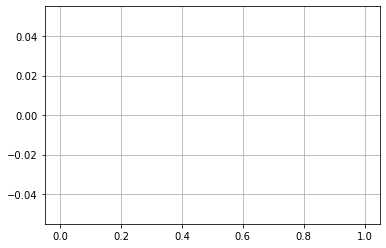

In [19]:
print('Skew {:.2f}'.format(Data[Data['Cliente - Local.1']==
                                '3200134185']['Kilos Venta KG'].skew()))

print('mean {:.2f}'.format(Data[Data['Cliente - Local.1']==
                                '3200134185']['Kilos Venta KG'].mean())
     )

print('Std {:.2f}'.format(Data[Data['Cliente - Local.1']==
                                '3200134185']['Kilos Venta KG'].std())
     )

print('Cov {:.2f}'.format(Data[Data['Cliente - Local.1']==
                                '3200134185']['Kilos Venta KG'].std()
                              / Data[Data['Cliente - Local.1']==
                                '3200134185']['Kilos Venta KG'].mean())
     )

Data[Data['Cliente - Local.1']=='3200134185']['Kilos Venta KG'].hist()

In [20]:
L=(Data[Data['Cliente - Local.1']=='3200134185']['Kilos Venta KG'])

In [21]:
sigma=pd.DataFrame({'Kilos Venta KG':
              list((
                  Data[Data['Cliente - Local.1']==
                       '3200134185']['Kilos Venta KG']))}).apply(lambda x: np.log(x)).std()
mu=pd.DataFrame({'Kilos Venta KG':
              list((
                  Data[Data['Cliente - Local.1']==
                       '3200134185']['Kilos Venta KG']))}).apply(lambda x: np.log(x)).mean()
sigma=sigma[0]
mu=mu[0]

array([[<AxesSubplot:title={'center':'Kg'}>]], dtype=object)

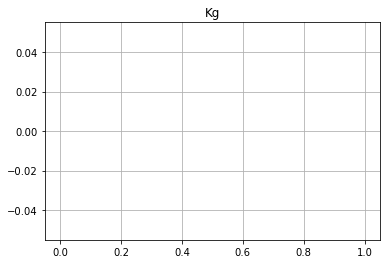

In [22]:
s = np.random.lognormal( mu, sigma, 10000)
pd.DataFrame({'Kg':s}).hist()

In [23]:
mu
#sigma

nan

``` python
#mu, sigma = 70.96, 20.47 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)  
#s=np.array(int(i) for i in s)
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)

pdf = (
    (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)))\
    /(x * sigma * np.sqrt(2 * np.pi))
)

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()
``` 

``` python
mu, sigma = 0.4,0.2 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)  
#s=np.array(int(i) for i in s)
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)

pdf = (
    (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)))\
    /(x * sigma * np.sqrt(2 * np.pi))
)

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()
``` 

## Graficos

### Precio vs Tiempo

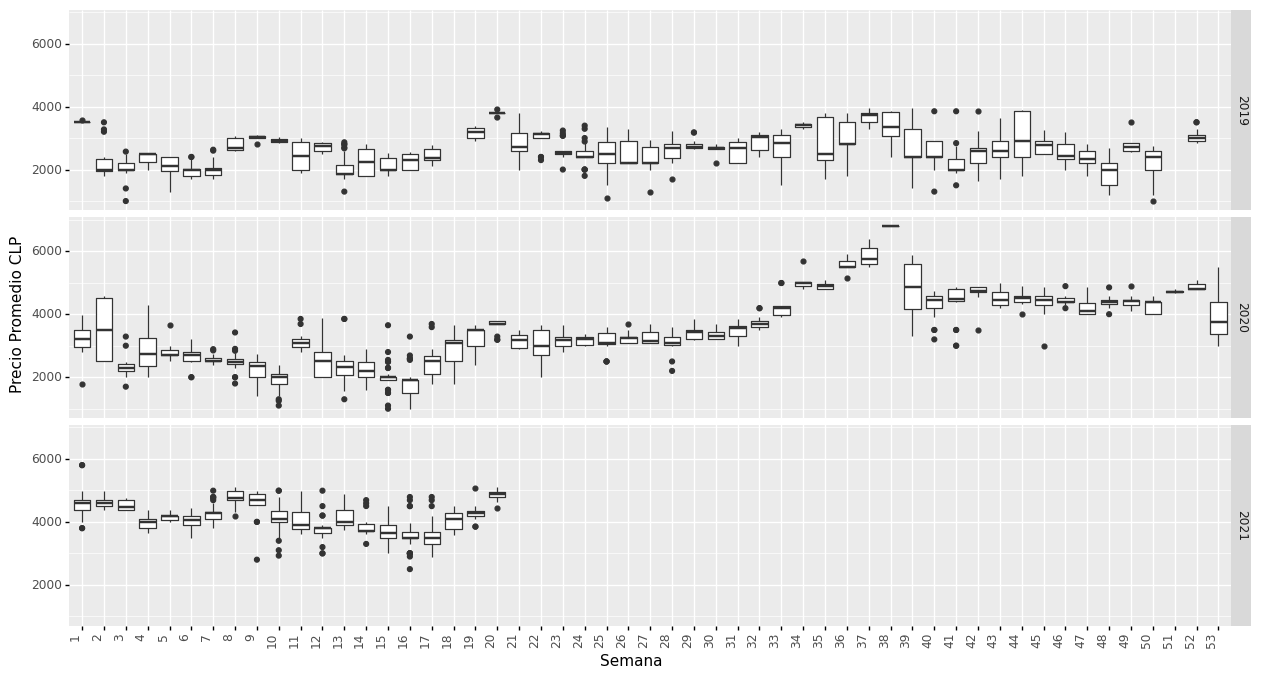

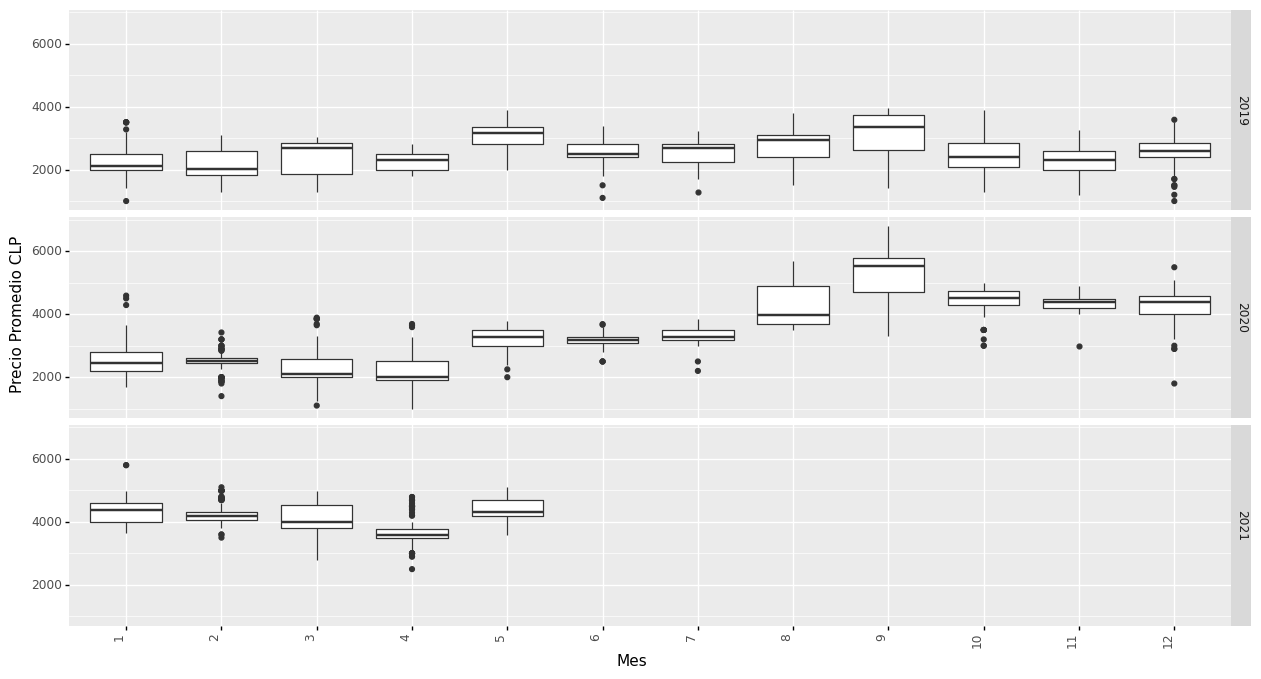

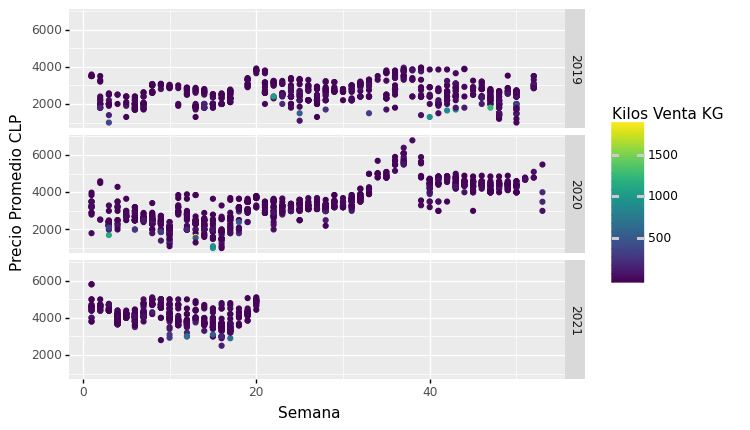

[<ggplot: (140422468247)>, <ggplot: (140422475002)>, <ggplot: (140422477834)>]

In [24]:
grap_pre_time=list()

df=Data.copy()#[Data['Precio Unitario CLP / KG']<5000]
df['Semana']=df['Semana'].astype('category')
df['Año']=df['Año'].astype('category')
df.Mes=df.Mes.astype('int64')


grap_pre_time.append(
    ggplot(df, aes(x='Semana',
                 y='Precio Promedio CLP') )\
+ geom_boxplot() + facet_grid('Año~.')\
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,8)))

df.Mes=df.Mes.astype('category')
grap_pre_time.append(ggplot(df, aes(x='Mes',
                 y='Precio Promedio CLP') )\
+ geom_boxplot() + facet_grid('Año~.')\
+theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(15,8)))

#df=Data[Data['Precio Unitario CLP / KG']<5000]
grap_pre_time.append(ggplot(Data, aes(x='Semana',
                 y='Precio Promedio CLP', color = "Kilos Venta KG" ) )\
+ geom_point() + facet_grid('Año~.'))
grap_pre_time

### Distribución precio

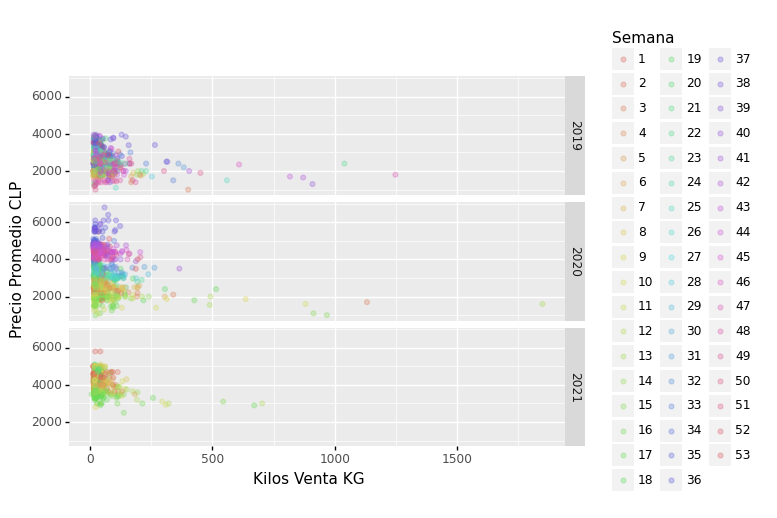

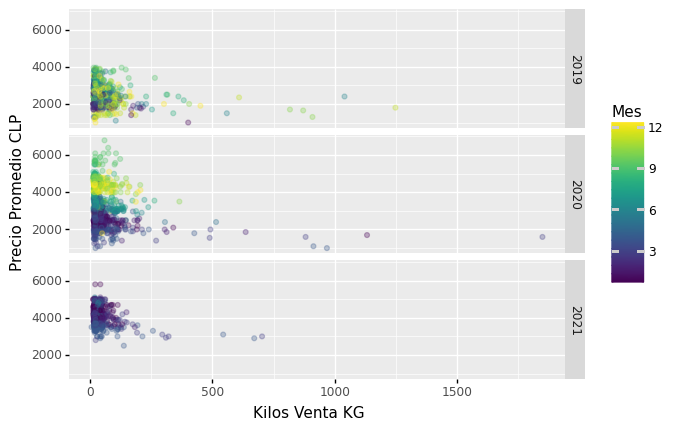

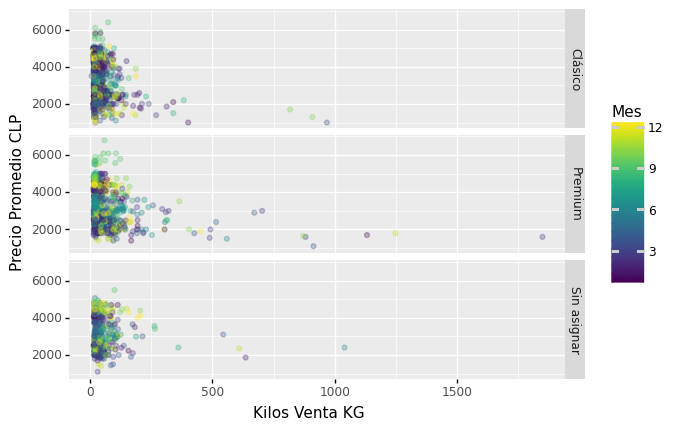

[<ggplot: (140424004560)>, <ggplot: (140424004572)>, <ggplot: (140422466250)>]

In [25]:
G_distr=list()
G_distr.append(ggplot(df, aes(x='Kilos Venta KG',
                 y='Precio Promedio CLP',
               color = "Semana")) \
+ geom_point( alpha=0.3) + facet_grid('Año~.'))

df['Mes']=df['Mes'].astype('int64')

G_distr.append(
ggplot(df, aes(x='Kilos Venta KG',
                 y='Precio Promedio CLP',
               color = "Mes")) \
+ geom_point( alpha=0.3) + facet_grid('Año~.'))
G_distr.append(
ggplot(df, aes(x='Kilos Venta KG',
                 y='Precio Promedio CLP',
               color = "Mes")) \
+ geom_point( alpha=0.3) + facet_grid('Cluster~.'))
G_distr

### Descripción Skew

In [26]:
Gdf=(df.groupby('Semana').skew())#['Precio Promedio CLP','Kilos Venta KG']

In [27]:
Gdf.describe()

,Oficina de Ventas Unifica.1,Cliente - Local.1,Mes,Año natural/Semana,Kilos Venta KG,Venta Neta CLP,Precio Promedio CLP
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,-0.644388,-0.763448,-0.021813,-0.163987,3.221227,2.847767,-0.058517
std,2.559674,0.375068,1.183362,0.809514,1.860207,1.563729,0.775725
min,-10.440200,-1.737954,-3.297526,-1.636518,-0.351007,0.110927,-2.285368
25%,0.003203,-0.919250,0.000000,-0.633238,1.871828,1.700429,-0.482740
50%,0.202287,-0.789710,0.000000,-0.215080,2.679754,2.774604,-0.041653
75%,0.308035,-0.617090,0.000000,0.053374,5.244453,3.844394,0.408978
max,0.622334,0.123362,5.000000,3.000000,6.855903,6.422721,1.923169


## Guardar graficos PDF

### Precio vs Tiempo

In [28]:
#grap_pre_time
save_as_pdf_pages(grap_pre_time,
'Dispersión Precio Tiempo.pdf')

C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: Dispersión Precio Tiempo.pdf


### Distribución precio

In [29]:
G_distr
save_as_pdf_pages(G_distr,
                  'Precio Lote P x Q .pdf')

C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: Precio Lote P x Q .pdf


## Grafico dispersión de los precios

In [30]:
from sklearn.model_selection import train_test_split
y=Data[['Precio Promedio CLP']].copy()
X=Data[['Kilos Venta KG','Año']].copy()
#X['Semana']=X['Semana'].astype('category')
X['Año']=X['Año'].astype('int64')
X['Año']=X['Año']-2019
X['Kilos Venta KG 2']=Data[['Kilos Venta KG']]**2
X['Kilos Venta KG 3']=Data[['Kilos Venta KG']]**3
X['Kilos Venta KG 4']=Data[['Kilos Venta KG']]**4
#X.dtypes
X=pd.get_dummies(X, drop_first=True)
#X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)


print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#print("Las columnas del modelo:",(X.columns))

print("La variación del precio con")
print("respecto al tamaño de lote es la siguiente función")
print(" como X Kilos Venta KG: ",(ridge.coef_[0][0]),'X + ',
      (ridge.coef_[0][2]),'X^2 + ',(ridge.coef_[0][3]),'X^3'
      ,'\n')

print('Lo que se traduce que por aumentar un lote en 22 kilogramos')
print('el Precio CLP deberia ser en {:.2f}'
      .format(ridge.coef_[0][0]*22+ridge.coef_[0][2]*22**2+
              ridge.coef_[0][3]*22**3+ridge.intercept_[0]),'CLP \n',
              'para la primera semana de enero')
print('\nEl intercepto es {:.2f}'.format((ridge.intercept_[0])))

Training set score: 0.37
Test set score: 0.37
La variación del precio con
respecto al tamaño de lote es la siguiente función
 como X Kilos Venta KG:  -5.1713965501253325 X +  0.006713192722884609 X^2 +  -3.70037235363621e-06 X^3 

Lo que se traduce que por aumentar un lote en 22 kilogramos
el Precio CLP deberia ser en 2641.45 CLP 
 para la primera semana de enero

El intercepto es 2752.01


C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.73823e-24): result may not be accurate.


In [31]:
df=y.copy()
df['Kilos Venta KG']=X['Kilos Venta KG']
df['Prediccion del Precio']=ridge.predict(X)
df['Diferencia entre los precios']=df['Precio Promedio CLP']-df['Prediccion del Precio']
df['Semana']=Data['Semana'].copy()
df['Año']=Data['Año'].copy()

In [32]:
#######################################
# Clustering tomando en cuenta df
######################################
print('clustering')
import kmeans1d
DE=df.copy()
DE=DE[DE['Año']==2020]
#DE = DE[DE['Peso neto KG']<2500]
x = list(DE['Diferencia entre los precios'])
k = 5
clusters, centroids = kmeans1d.cluster(x, k)

DE['Ranking de precio']=clusters
DE['Ranking de precio']= DE['Ranking de precio'].astype('category')

#--------------------------------------
# Grafico de dispersion de los precios clusterizados
#--------------------------------------
Graph_Disp=list()

Graph_Disp.append(ggplot(DE, aes(x='Kilos Venta KG',y='Precio Promedio CLP'
                 ))\
+ geom_point(aes(color='Diferencia entre los precios'),alpha=0.4)\
+ geom_line(aes(x='Kilos Venta KG',y='Prediccion del Precio'),
            color='red', size=2,alpha=0.5)\
            + facet_grid('Año~.')\
+ggtitle('Grafico de los Ranking de Precios')
)

Graph_Disp.append(ggplot(DE, aes(x='Kilos Venta KG',y='Precio Promedio CLP'
                 ))\
+ geom_point(aes(color='Ranking de precio'),alpha=0.4)\
+ geom_line(aes(x='Kilos Venta KG',y='Prediccion del Precio'),
            color='red', size=2,alpha=0.5)\
            + facet_grid('Año~.')\
+ggtitle('Grafico de los Ranking de Precios')
                 )



clustering


### Grafico Dispersión

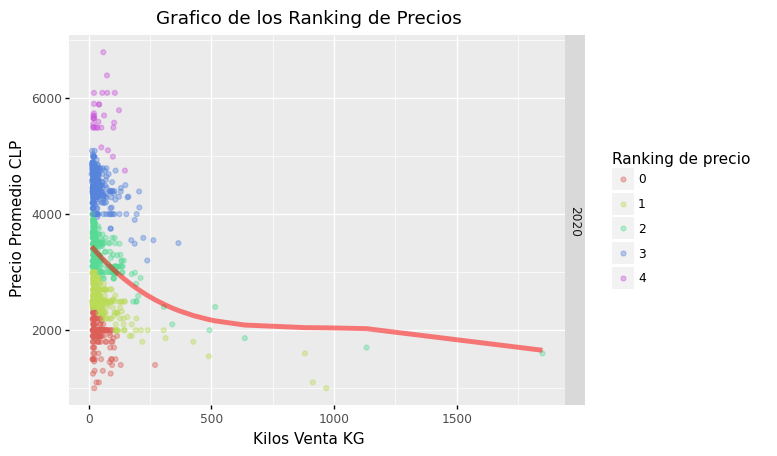

<ggplot: (140423809133)>

In [33]:
DE['Ranking de precio']= DE['Ranking de precio'].astype('category')
Graph_Disp[1]

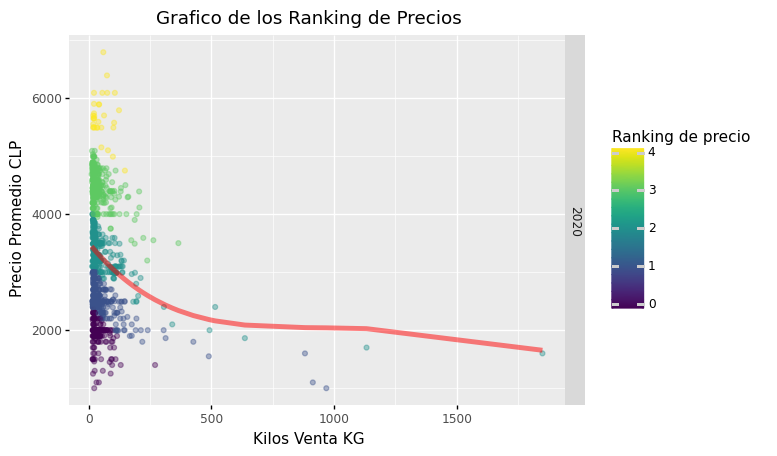

<ggplot: (140423809133)>

In [34]:
DE['Ranking de precio']= DE['Ranking de precio'].astype('int64')
Graph_Disp[1]

# Regresión Ridge
### Suavisa el error de la varianza
En este sentido (y asumiendo un modelo lineal), cuanto mayor
es $k$ más grande es el sesgo pero menor es la variancia del
estimador, y la determinaci´on final implica un compromiso
entre ambos términos (Izenman, 2008).
## Peso(4 dimensiones) + Semana
### Evaluación de los coeficientes 
* $P$ Precio Estimado
* $Q$ Peso neto KG
* $w_i$ Semana $i$ del conjunto de semanas $W$
\begin{equation}
P(Q,W)=\beta_0Q+\sum_{i\in W}\beta_iw_i+C
\end{equation}

In [35]:
from sklearn.model_selection import train_test_split
y=Data[['Precio Promedio CLP']].copy()
X=Data[['Kilos Venta KG','Semana','Año']].copy()
X['Semana']=X['Semana'].astype('category')
X['Año']=X['Año'].astype('int64')
X['Año']=X['Año']-2019
X['Kilos Venta KG 2']=Data[['Kilos Venta KG']]**2
X['Kilos Venta KG 3']=Data[['Kilos Venta KG']]**3
X['Kilos Venta KG 4']=Data[['Kilos Venta KG']]**4
#X.dtypes
X=pd.get_dummies(X, drop_first=True)
#X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)


print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#print("Las columnas del modelo:",(X.columns))

print("La variación del precio con")
print("respecto al tamaño de lote es la siguiente función")
print(" como X Kilos Venta KG: ",(ridge.coef_[0][0]),'X + ',
      (ridge.coef_[0][2]),'X^2 + ',(ridge.coef_[0][3]),'X^3'
      ,'\n')

print('Lo que se traduce que por aumentar un lote en 22 kilogramos')
print('el Precio CLP deberia ser en {:.2f}'
      .format(ridge.coef_[0][0]*22+ridge.coef_[0][2]*22**2+
              ridge.coef_[0][3]*22**3+ridge.intercept_[0]),'CLP \n',
              'para la primera semana de enero')
print('\nEl intercepto es {:.2f}'.format((ridge.intercept_[0])))

Training set score: 0.71
Test set score: 0.72
La variación del precio con
respecto al tamaño de lote es la siguiente función
 como X Kilos Venta KG:  -5.0136807483691985 X +  0.00767596773748482 X^2 +  -5.219736606705711e-06 X^3 

Lo que se traduce que por aumentar un lote en 22 kilogramos
el Precio CLP deberia ser en 2647.45 CLP 
 para la primera semana de enero

El intercepto es 2754.09


C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.13941e-27): result may not be accurate.


## Interpretación Coeficientes
Recordar que un modelo de regresión lineal es basicamente

$Y=\beta*X+C$

Donde  $X$ es un Vector con la cual se intenta predecir el comportamiento de $Y$.
Este vector tiene la cantidad de dimenciones iguales a las columnas del DataFrame `X`.

Por tanto cada $X_i$ es `X[i]`

In [36]:
pd.DataFrame( {'Columnas':X.columns,
               'Coeficientes':(ridge.coef_[0]).astype('float64')})

,Columnas,Coeficientes
0,Kilos Venta KG,-5.013681e+00
1,Año,1.035731e+03
2,Kilos Venta KG 2,7.675968e-03
3,Kilos Venta KG 3,-5.219737e-06
4,Kilos Venta KG 4,1.249401e-09
5,Semana_2,-6.281537e+01
6,Semana_3,-7.771310e+02
7,Semana_4,-6.218820e+02
8,Semana_5,-6.090570e+02
9,Semana_6,-7.328797e+02


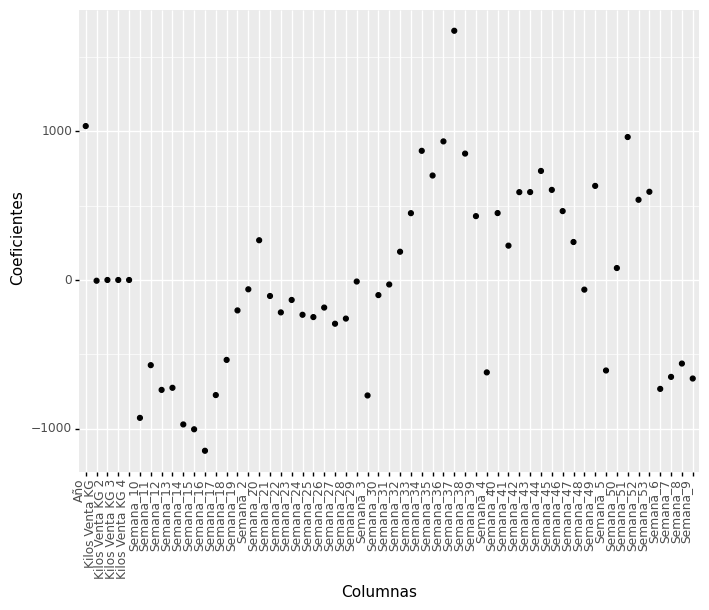

<ggplot: (140423819334)>

In [37]:

ggplot(pd.DataFrame( {'Columnas':X.columns,
               'Coeficientes':(ridge.coef_[0]).astype('float64')})
       , aes(x='Columnas',
                 y='Coeficientes')) \
       +geom_point()\
       +theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(8,6))

# Visualización de las predicciones

In [38]:
df=y.copy()
df['Kilos Venta KG']=X['Kilos Venta KG']
df['Prediccion del Precio']=ridge.predict(X)
df['Diferencia entre los precios']=df['Precio Promedio CLP']-df['Prediccion del Precio']
df['Semana']=Data['Semana'].copy()
df['Año']=Data['Año'].copy()

# Precio y Delta promedio ponderado Semanal

Para esta ponderación el total será el peso total del las ventas realizadas en la semana.


$PrecioPromedio_{Semana}= \sum \dfrac{Precio*Peso_{neto}[Kg]}{PesoTotal_{Semana}}$

In [39]:
#Genero una copia para no agregar una columna a df
de=df.copy()
de['Pesado']=de['Diferencia entre los precios']*de['Kilos Venta KG']
#Calculo el  Peso neto KG total, para usarlo de divisor
Total_semana=list(de.groupby(['Semana'])['Kilos Venta KG'].sum())

# Se realiza la suma de todos los Delta*Peso
Promedio=list(de.groupby(['Semana'])['Pesado'].sum())#/Total_semana

Desv=list(de.groupby(['Semana'])['Diferencia entre los precios'].std())#/Total_semana

# Se divide la suma anterior por el Total para cada semana
for i in range(len(Total_semana)):
    Promedio[i]=Promedio[i]/Total_semana[i]

# Precio promedio ponderado
de['PrecioPesado']=de['Precio Promedio CLP']*de['Kilos Venta KG']

#Calculo el  Peso neto KG total, para usarlo de divisor
Total_semana=list(de.groupby(['Semana'])['Kilos Venta KG'].sum())

# Se realiza la suma de todos los Delta*Peso
PromedioPrecio=list(de.groupby(['Semana'])['PrecioPesado'].sum())#/Total_semana

# Se divide la suma anterior por el Total para cada semana
for i in range(len(Total_semana)):
    PromedioPrecio[i]=PromedioPrecio[i]/Total_semana[i]

Grup=de.groupby(['Semana','Año']).sum()['Kilos Venta KG']

Venta_seman=list(pd.DataFrame({'Semana':[(list(Grup.index)[i][0]) for i in range(len(Grup)) ],
              'Kilos Venta KG':list(Grup)
             }).groupby('Semana').mean()['Kilos Venta KG'])

#-----------------------------------------------
# Genero el DataFrame con los valores de interes
Df=pd.DataFrame({'Semana':list([i for i in range(1,54)]),
                 'Diferencia promedio entre los precios(Ponderada Kg)':Promedio,
                 'Precio Promedio Ponderado CLP / KG':PromedioPrecio,
                 'Ventas promedio Kg':Venta_seman,
                 'Desv de Delta':Desv
                })

# Clustering to Week from Coefficient 

['Link de pag que descarga el paquete para hacer el kmeans 1d']('https://pypi.org/project/kmeans1d')


Si se desea cambiar a el proemdio del delta se cambia
```python
x =[0]
for i in ridge.coef_[0][4:]:
    x.append(i)
```

In [40]:
#ridge.coef_[]
list(X.columns).index('Semana_2')

5

In [41]:
import kmeans1d
x =[0]
for i in ridge.coef_[0][list(X.columns).index('Semana_2'):]:
    x.append(i)
k = 5
clusters, centroids = kmeans1d.cluster(x, k)
Df['Coeficientes']=x
Df['Tipo de Semana']=clusters
Df['Tipo de Semana']=Df['Tipo de Semana'].astype('category')

In [42]:
Df.dtypes

Semana                                                    int64
Diferencia promedio entre los precios(Ponderada Kg)     float64
Precio Promedio Ponderado CLP / KG                      float64
Ventas promedio Kg                                      float64
Desv de Delta                                           float64
Coeficientes                                            float64
Tipo de Semana                                         category
dtype: object

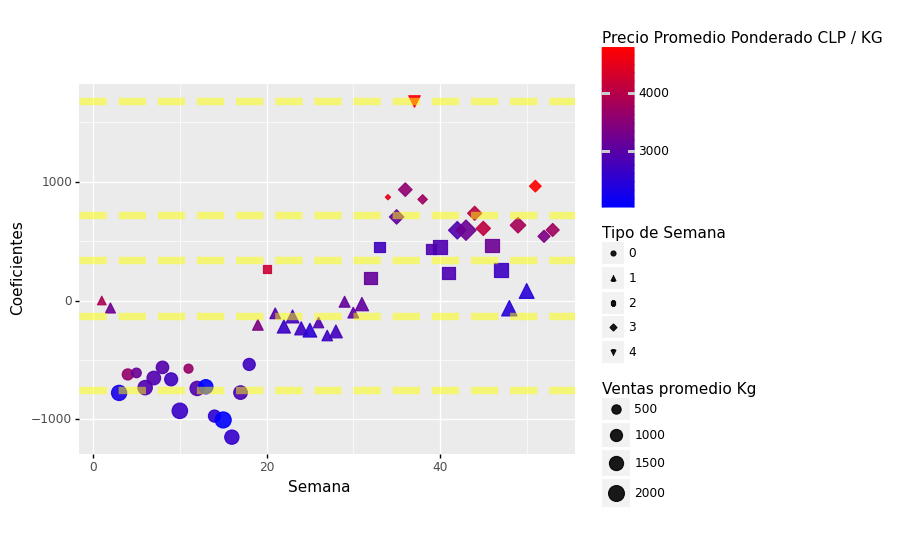

<ggplot: (140422671532)>

In [43]:
###################################################################
#                     Clusterizado(Forma)
#           Centroides(Lineas amarillas)
#    Grafica de dispercion Delta ponderado 
#    X=Semana Y=Delta ponderado
###################################################################
Grap_cluster_week=(ggplot(Df, aes(x='Semana',y='Coeficientes',
               size='Ventas promedio Kg',color='Precio Promedio Ponderado CLP / KG'
                 ))\
+ geom_point(aes(shape='Tipo de Semana'),alpha=0.9)\
+ scale_color_gradient(low='blue', high='red')\
 + geom_hline(yintercept = centroids,
                               color='yellow',    # set line colour
                  size=3,            # set line thickness
                  linetype="dashed",alpha=0.5  # set line type
) # add many horizontal lines using a list
                  )
Grap_cluster_week

# Data clientes

`{'Nombre_cliente':Data['Dest. MercancÃ­a.1'].unique()`

con el nombre, existe la posibilidad de que existan nombres iguales, por ello los unque de nombre no necesariamente tendán las mismas cantidad que los codigo.


### Creación Data clientes

In [44]:
Data.columns

Index(['Material', 'Tipo de cliente', 'Zona de ventas', 'Zona de ventas.1',
       'Oficina de Ventas Unifica', 'Oficina de Ventas Unifica.1',
       'Subtipo de cliente', 'Cluster', 'Cliente - Local', 'Cliente - Local.1',
       'Mes', 'Año natural/Semana', 'Día natural', 'Día de la semana',
       'Kilos Venta KG', 'Venta Neta CLP', 'Precio Promedio CLP', 'Semana',
       'Año'],
      dtype='object')

In [45]:
# Creamos la Data clientes para almacenar las caracteristicas de los clientes
D_Clientes=pd.DataFrame({'Cliente - Local.1':Data['Cliente - Local.1'].unique()
                        })
D_Clientes['Cliente - Local.1']=D_Clientes['Cliente - Local.1'].astype('category')
D_Clientes.shape

(257, 1)

# Función de Clustering

In [46]:
Df.columns

Index(['Semana', 'Diferencia promedio entre los precios(Ponderada Kg)',
       'Precio Promedio Ponderado CLP / KG', 'Ventas promedio Kg',
       'Desv de Delta', 'Coeficientes', 'Tipo de Semana'],
      dtype='object')

In [47]:
Cslist=['Tipo de Semana 0','Tipo de Semana 1','Tipo de Semana 2',
        'Tipo de Semana 3','Tipo de Semana 4']



In [48]:
def Creat_colum_df(i):
    #_______________________________
    # Me paro en el cluster i
    #_______________________________
    Cs=Cslist[i]
    C0=list(Df[Df['Tipo de Semana']==i]['Semana'])
    print(Cs)
    print('Descripción del Cluster')
    D0=Data[Data['Semana'].isin(C0)].copy()
    D0['Semana']=D0['Semana'].astype('category')
    print('Dimensiones de la Data',D0.shape)
    print('Las dimenciones de dataframe son:',D0.shape)
    print(D0['Kilos Venta KG'].describe())
    print(D0['Precio Promedio CLP'].describe())
    
    #---------------------------------------
    #################################################
    # Regresión del Predicion para el cluster
    #################################################
    # Se particiona en entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    y=D0[['Precio Promedio CLP']].copy()
    X=D0[['Kilos Venta KG','Año']].copy()
    X['Año']=X['Año'].astype('int64')
    X['Año']=X['Año']-2019
    X['Kilos Venta KG 2']=D0[['Kilos Venta KG']]**2
    X['Kilos Venta KG 3']=D0[['Kilos Venta KG']]**3


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    from sklearn.linear_model import Ridge
    ridge = Ridge().fit(X_train, y_train)
    print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
    
    #--------------------------------------------
    #Se genera un nuevo data frame con
    #los valores predictivos y los delta porcentaje y delta.
    #--------------------------------------
    Y_pre=ridge.predict(X)
    df=X.copy()
    df['Precio Promedio CLP']=y
    df['Prediccion del Precio']=Y_pre
    
    df['Diferencia entre los precios']=\
        df['Precio Promedio CLP']-df['Prediccion del Precio']
    
    df['Diferencia porcentual entre los precios']=(
        df['Precio Promedio CLP']-df['Prediccion del Precio'])/(
        df['Prediccion del Precio'])
    
    df['Semana']=D0['Semana']
    df['Año']=D0['Año']
    df['Cliente - Local.1']=D0['Cliente - Local.1']
    
    #######################################
    # Clustering tomando en cuenta df
    ######################################
    print('clustering')
    import kmeans1d
    DE=df.copy()
    #DE = DE[DE['Peso neto KG']<2500]
    x = list(DE['Diferencia porcentual entre los precios'])
    k = 5
    clusters, centroids = kmeans1d.cluster(x, k)

    DE['Ranking de precio']=clusters
    DE['Ranking de precio']= DE['Ranking de precio'].astype('category')
    
    #--------------------------------------
    # Grafico de dispersion de los precios clusterizados
    #--------------------------------------
    Gpdf.append(ggplot(DE, aes(x='Kilos Venta KG',y='Precio Promedio CLP'
                     ))\
    + geom_point(aes(color='Ranking de precio'),alpha=0.4)\
    + geom_line(aes(x='Kilos Venta KG',y='Prediccion del Precio'),
                color='red', size=2,alpha=0.5)\
                + facet_grid('Año~.')\
    +ggtitle('Grafico de los Ranking de Precios para el'+ Cs)
    )
    
    #-------------------------------------
    # Creación de la columna que se incorpora a la data clientes
    #---------------------------------------------

    #DF con los promedios de cada clientes,
    #no se si index representa el Cliente - Local.1
    #deberia
    DE['Ranking de precio']= DE['Ranking de precio'].astype('int64')
    Cust=(pd.DataFrame({
        'Cliente - Local.1':list((DE.groupby('Cliente - Local.1')['Ranking de precio'].mean()).index),
        Cs:list((DE.groupby('Cliente - Local.1')['Ranking de precio'].mean()))}
    )#data frame
    )
    Cust=Cust[~Cust[Cs].isnull()]
    print(Cust.shape)
    return Cust

## Procesamiento de las diferentes Tipo de Semanas 

In [49]:
Gpdf=list()
Gpdf.append(Grap_cluster_week)
for i in range(5):#
    D_Clientes=pd.merge(Creat_colum_df(i), D_Clientes  
         , how='right')

Tipo de Semana 0
Descripción del Cluster
Dimensiones de la Data (1211, 19)
Las dimenciones de dataframe son: (1211, 19)
count    1211.000000
mean       50.988439
std        95.273577
min         6.000000
25%        20.000000
50%        26.000000
75%        48.000000
max      1849.000000
Name: Kilos Venta KG, dtype: float64
count    1211.000000
mean     3029.414533
std       946.627947
min      1000.000000
25%      2260.000000
50%      2800.000000
75%      3860.000000
max      5098.000000
Name: Precio Promedio CLP, dtype: float64
Training set score: 0.64
Test set score: 0.64
clustering
(196, 2)
Tipo de Semana 1
Descripción del Cluster
Dimensiones de la Data (730, 19)
Las dimenciones de dataframe son: (730, 19)
count     730.000000
mean       47.683562
std        60.524818
min        12.000000
25%        21.000000
50%        27.000000
75%        52.750000
max      1040.000000
Name: Kilos Venta KG, dtype: float64
count     730.000000
mean     3079.223288
std       782.842810
min      1000

C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17724e-17): result may not be accurate.



Tipo de Semana 3
Descripción del Cluster
Dimensiones de la Data (292, 19)
Las dimenciones de dataframe son: (292, 19)
count    292.000000
mean      48.636986
std       76.356361
min       11.000000
25%       20.000000
50%       29.500000
75%       50.250000
max      871.000000
Name: Kilos Venta KG, dtype: float64
count     292.000000
mean     3876.085616
std       985.810300
min      1650.000000
25%      2900.000000
50%      4300.000000
75%      4590.000000
max      6790.000000
Name: Precio Promedio CLP, dtype: float64
Training set score: 0.77
Test set score: 0.83
clustering
(91, 2)
Tipo de Semana 4
Descripción del Cluster
Dimensiones de la Data (27, 19)
Las dimenciones de dataframe son: (27, 19)
count     27.000000
mean      65.888889
std       59.471605
min       15.000000
25%       21.000000
50%       42.000000
75%      101.500000
max      265.000000
Name: Kilos Venta KG, dtype: float64
count      27.000000
mean     4777.481481
std      1139.637303
min      3300.000000
25%      374

C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.36564e-17): result may not be accurate.


In [50]:
#Gpdf

### Grabar PDF

In [51]:
#save_as_pdf_pages(Gpdf,'(2019-2020)Graficos Disp Clus Prec por semana.pdf')

In [52]:
D_Clientes.describe(include='all')

,Cliente - Local.1,Tipo de Semana 4,Tipo de Semana 3,Tipo de Semana 2,Tipo de Semana 1,Tipo de Semana 0
count,257,17.000000,91.000000,100.000000,151.000000,196.000000
unique,257,NaN,NaN,NaN,NaN,NaN
top,36615,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.452941,1.988894,1.673199,2.106859,1.342109
std,NaN,0.911810,0.803282,0.907272,0.981339,0.801549
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.583333,1.000000,1.500000,1.000000
50%,NaN,2.500000,2.000000,1.833333,2.000000,1.333333
75%,NaN,3.000000,2.500000,2.212500,2.791667,2.000000


In [53]:
#D_Clientes.groupby('cluster 1')

array([[<AxesSubplot:title={'center':'Tipo de Semana 4'}>,
        <AxesSubplot:title={'center':'Tipo de Semana 3'}>],
       [<AxesSubplot:title={'center':'Tipo de Semana 2'}>,
        <AxesSubplot:title={'center':'Tipo de Semana 1'}>],
       [<AxesSubplot:title={'center':'Tipo de Semana 0'}>,
        <AxesSubplot:>]], dtype=object)

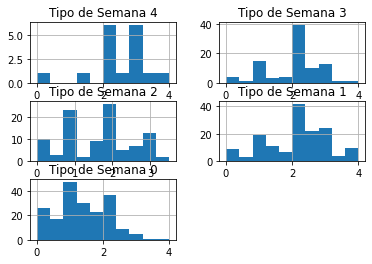

In [54]:
D_Clientes.hist()

In [55]:
Df.columns

Index(['Semana', 'Diferencia promedio entre los precios(Ponderada Kg)',
       'Precio Promedio Ponderado CLP / KG', 'Ventas promedio Kg',
       'Desv de Delta', 'Coeficientes', 'Tipo de Semana'],
      dtype='object')

# Grabar CSV
```python
################################
# Grabar CSV con los clusters
################################
file_name='Cluster_week_19_20.csv'
Df.to_csv(file_name, sep=';', encoding='utf-8', index=False)

################################
# Grabar CSV con los CLientes precios
################################
file_name='Clientes_precios_19_20.csv'
D_Clientes.to_csv(file_name, sep=';', encoding='utf-8', index=False)
```

In [56]:
################################
# Grabar CSV con los clusters
################################
file_name='Cluster_week_19_20.csv'
Df.to_csv(file_name, sep=';', encoding='utf-8', index=False)

In [57]:
################################
# Grabar CSV con los CLientes precios
################################
file_name='Clientes_precios_19_20.csv'
D_Clientes.to_csv(file_name, sep=';', encoding='utf-8', index=False)

# Función Precio promedio cliente en cada cluster

In [58]:
def Ajuste_anual_P(x,beta):
    x['Precio Promedio CLP']+=(2021-x['Año'])*beta
    return (x)

In [59]:
def Price_df_tip_sem(i):
    #_______________________________
    # Me paro en el cluster i
    #_______________________________
    Cs=Cslist[i]
    C0=list(Df[Df['Tipo de Semana']==i]['Semana'])
    #print(Cs)
    #print('Descripción del Tipo de Semana')
    
    D0=Data[Data['Semana'].isin(C0)].copy()
    
    D0['Semana']=D0['Semana'].astype('category')
    
    print('Dimensiones de la Data',D0.shape)
    #print(D0['Kilos Venta KG'].describe())
    #print(D0['Precio Promedio CLP'].describe())
    
    #---------------------------------------
    #################################################
    # Regresión del Predicion para el cluster
    #################################################
    # Se particiona en entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    y=D0[['Precio Promedio CLP']].copy()
    X=D0[['Kilos Venta KG','Año']].copy()
    X['Año']=X['Año'].astype('int64')
    X['Año']=X['Año']-2019#año 0 es el año 2019
    X['Kilos Venta KG 2']=D0[['Kilos Venta KG']]**2
    X['Kilos Venta KG 3']=D0[['Kilos Venta KG']]**3


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    from sklearn.linear_model import Ridge
    ridge = Ridge().fit(X_train, y_train)
    #ridge = Ridge().fit(X, y)
    print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
    
    año_max=max(D0['Año'].to_list())
    
    beta=ridge.coef_[0][X.columns.to_list().index('Año')]
    def Ajuste_anual_P(x):
        x['Precio Promedio CLP']+=(año_max-x['Año'])*beta
        return (x)
    #print(D0.iloc[2])
    D0=D0.apply(lambda x: Ajuste_anual_P(x) , axis=1)
    #print(D0.iloc[2])
    

    #-------------------------------------------------------
    # Precio promedio cliente
    #-------------------------------------------------------
    D0['Precio Pond CLP']=D0['Precio Promedio CLP']*D0['Kilos Venta KG']

    C0=D0[['Cliente - Local.1','Precio Pond CLP','Kilos Venta KG']].groupby('Cliente - Local.1').sum().reset_index()

    #calculo el precio promedio ponderado por los KG de la compra
    C0['Precio Pond CLP']=C0['Precio Pond CLP']/C0['Kilos Venta KG']

    #calculo el Kilo de venta promedo del tipo de semana
    C0['Kilos Venta KG']=D0[['Cliente - Local.1','Kilos Venta KG']
                           ].groupby('Cliente - Local.1').mean().reset_index()['Kilos Venta KG']

    C0=C0.rename(columns={'Kilos Venta KG':('Kilos Venta KG promedio'+
                                            ' \n Tipo de Semana '+str(i)),
                          'Precio Pond CLP':('Precio Pond CLP'+
                                            ' \n Tipo de Semana '+str(i))
                         })
    
    #--------------------------------------
    # Grafico de dispersion de los precios clusterizados
    #--------------------------------------
    graph=(ggplot(C0, aes(x=C0.columns.to_list()[2],y=C0.columns.to_list()[1]
                     ))\
    + geom_point(color='blue' ,alpha=0.4)\
    +ggtitle('Dispersión Precio Promedio v/s Volumen de compra promedio \n'+ Cs)
)
    
    return  (C0,graph)
AFun=(Price_df_tip_sem(1))


Dimensiones de la Data (730, 19)
Training set score: 0.64
Test set score: 0.60


In [60]:
x,y=AFun

## Iteración

In [61]:
df_client_P=D_Clientes.copy()

In [62]:
GpdfPrice=list()
GpdfPrice.append(Grap_cluster_week)
for i in range(5):
    AFun=Price_df_tip_sem(i)
    df_client_P=pd.merge(AFun[0], df_client_P  
         , how='right')
    GpdfPrice.append(AFun[1])

Dimensiones de la Data (1211, 19)
Training set score: 0.64
Test set score: 0.64


C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17724e-17): result may not be accurate.


Dimensiones de la Data (730, 19)
Training set score: 0.64
Test set score: 0.60
Dimensiones de la Data (303, 19)
Training set score: 0.69
Test set score: 0.73
Dimensiones de la Data (292, 19)
Training set score: 0.77
Test set score: 0.83
Dimensiones de la Data (27, 19)
Training set score: 0.93
Test set score: 0.83


C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.36564e-17): result may not be accurate.


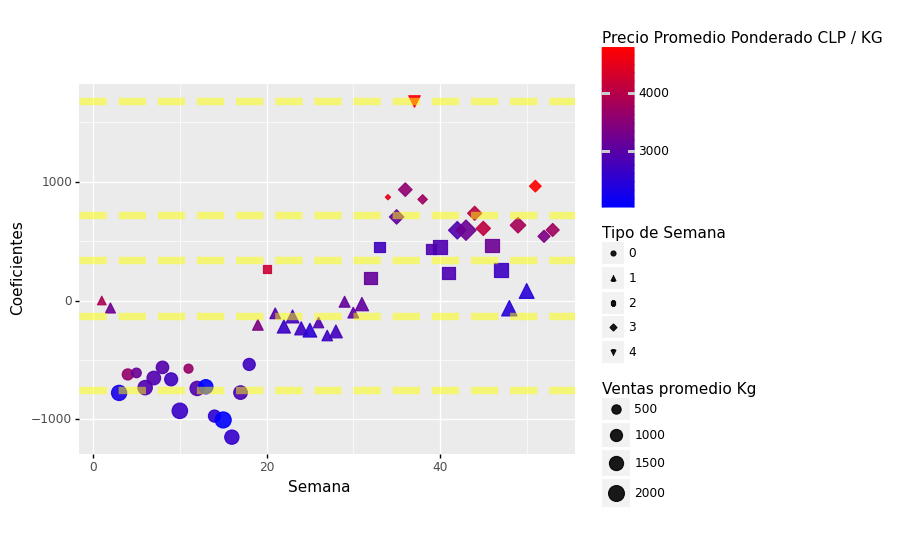

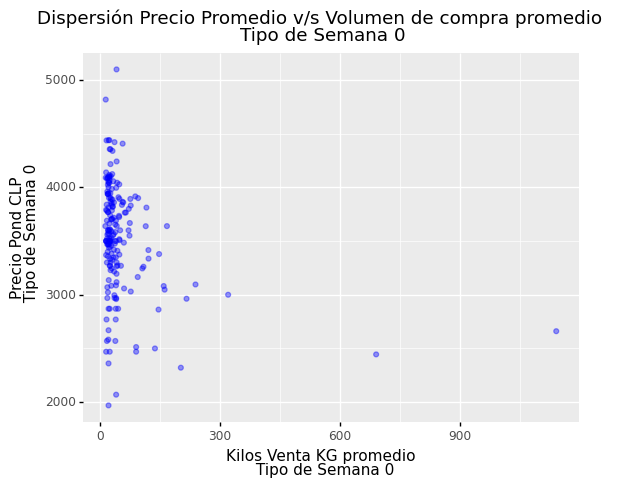

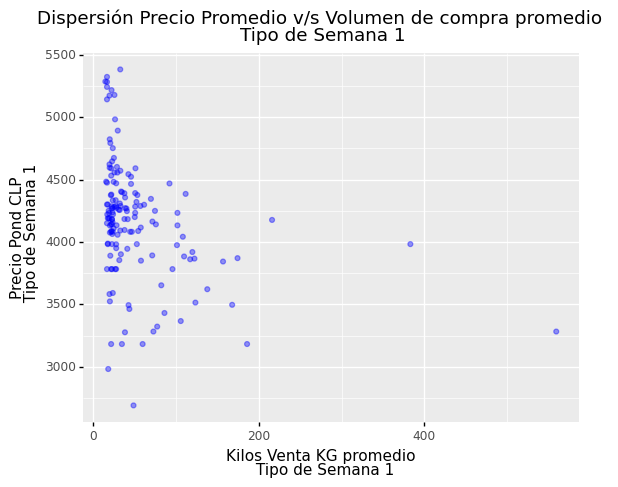

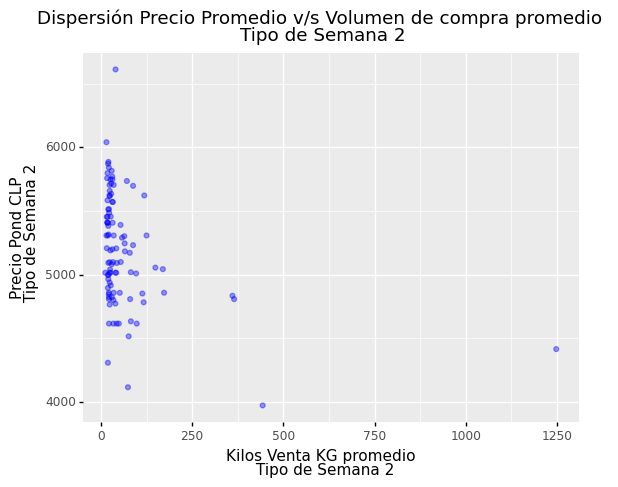

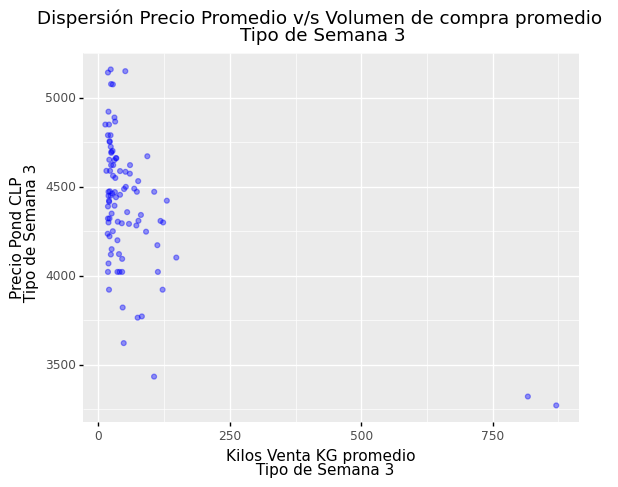

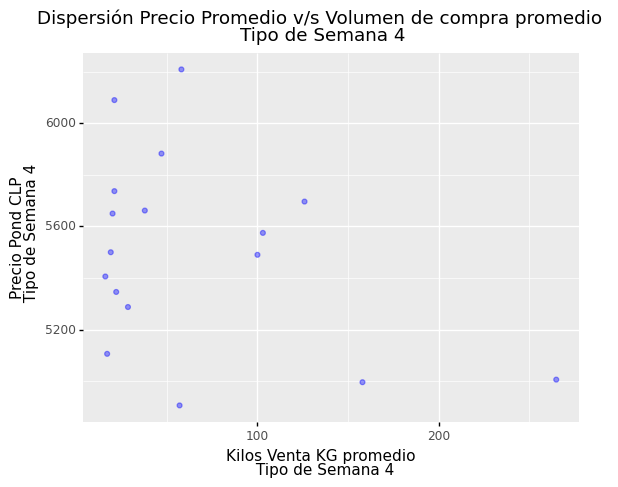

[<ggplot: (140422671532)>,
 <ggplot: (140422558504)>,
 <ggplot: (140423626192)>,
 <ggplot: (140422547996)>,
 <ggplot: (140424106873)>,
 <ggplot: (140422473385)>]

In [63]:
GpdfPrice

### Grabar PDF

In [64]:
save_as_pdf_pages(GpdfPrice,'(2019-2020)Graficos Prec volumen por tipo de semana.pdf')

C:\Users\user\anaconda3\envs\Clustering\lib\site-packages\plotnine\ggplot.py:820: PlotnineWarning: Filename: (2019-2020)Graficos Prec volumen por tipo de semana.pdf


## Grabar CSV

In [65]:
################################
# Grabar CSV con los CLientes precios
################################
file_name='Clientes_precios_promedio_19_20.csv'
df_client_P.to_csv(file_name, sep=';', encoding='utf-8', index=False)

In [66]:
df_client_P

,Cliente - Local.1,Precio Pond CLP \n Tipo de Semana 4,Kilos Venta KG promedio \n Tipo de Semana 4,Precio Pond CLP \n Tipo de Semana 3,Kilos Venta KG promedio \n Tipo de Semana 3,Precio Pond CLP \n Tipo de Semana 2,Kilos Venta KG promedio \n Tipo de Semana 2,Precio Pond CLP \n Tipo de Semana 1,Kilos Venta KG promedio \n Tipo de Semana 1,Precio Pond CLP \n Tipo de Semana 0,Kilos Venta KG promedio \n Tipo de Semana 0,Tipo de Semana 4,Tipo de Semana 3,Tipo de Semana 2,Tipo de Semana 1,Tipo de Semana 0
0,3200104287,NaN,NaN,NaN,NaN,NaN,NaN,4273.210526,28.500000,3820.303030,33.000000,NaN,NaN,NaN,2.000000,1.500000
1,3200154991,NaN,NaN,4702.014925,26.800000,NaN,NaN,4287.885255,33.333333,4056.982432,34.000000,NaN,2.800000,NaN,2.666667,2.285714
2,3200153241,5405.993216,16.0,4725.214497,23.333333,5014.770340,12.000000,NaN,NaN,3867.449102,27.333333,3.0,2.333333,1.000000,NaN,1.666667
3,46142,NaN,NaN,4475.226023,21.500000,5453.770340,18.000000,3431.299045,86.333333,4043.008392,43.466667,NaN,2.000000,2.000000,1.000000,2.133333
4,3200148795,NaN,NaN,NaN,NaN,NaN,NaN,3276.764658,38.666667,3348.784624,40.250000,NaN,NaN,NaN,0.000000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,19819,NaN,NaN,NaN,NaN,NaN,NaN,4086.949973,22.500000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
253,3200106889,5882.553191,47.0,5159.754601,23.285714,5620.837024,23.272727,4379.641089,22.238095,3813.463952,22.208333,2.5,2.785714,2.272727,2.333333,1.583333
254,3200149886,5490.000000,100.0,4300.000000,123.000000,5735.554184,71.000000,NaN,NaN,3409.148453,44.181818,2.0,2.000000,3.000000,NaN,0.727273
255,3200025543,NaN,NaN,NaN,NaN,5307.385170,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
